# STUDENT PERFORMANCE DATA SET PROJECT

# IMPORTING LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
df2 = pd.read_csv("../data/portPP.csv", sep = ",")
df2

Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
0             0       0    0   18        1        0        0     4     4   
1             1       0    0   17        1        0        1     1     1   
2             2       0    0   15        1        1        1     1     1   
3             3       0    0   15        1        0        1     4     2   
4             4       0    0   16        1        0        1     3     3   
..          ...     ...  ...  ...      ...      ...      ...   ...   ...   
644         644       1    0   19        0        0        1     2     3   
645         645       1    0   18        1        1        1     3     1   
646         646       1    0   18        1        0        1     1     1   
647         647       1    1   17        1        1        1     3     1   
648         648       1    1   18        0        1        1     3     2   

     traveltime  ...  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
0           2.0  ...              0             0             0            0   
1           1.0  ...              0             0             0            0   
2           1.0  ...              0             0             0            0   
3           1.0  ...              0             0             0            0   
4           1.0  ...              0             0             0            0   
..          ...  ...            ...           ...           ...          ...   
644         1.0  ...              1             0             0            0   
645         1.0  ...              0             1             0            0   
646         2.0  ...              0             0             0            0   
647         2.0  ...              1             0             0            0   
648         3.0  ...              1             0             0            0   

     Fjob_other  Fjob_services  Fjob_teacher  guardian_father  \
0             0              0             1                0   
1             1              0             0                1   
2             1              0             0                0   
3             0              1             0                0   
4             1              0             0                1   
..          ...            ...           ...              ...   
644           1              0             0                0   
645           0              1             0                0   
646           1              0             0                0   
647           0              1             0                0   
648           1              0             0                0   

     guardian_mother  guardian_other  
0                  1               0  
1                  0               0  
2                  1               0  
3                  1               0  
4                  0               0  
..               ...             ...  
644                1               0  
645                1               0  
646                1               0  
647                1               0  
648                1               0  

[649 rows x 48 columns]

# Correlation

In [3]:
plt.figure(figsize=(40,20))
sns.heatmap(df2.corr(), annot = True, cmap = "YlGnBu")
plt.show()

# ALGORITHMS

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
y = df2["letter_grade"]
x = df2.drop(["letter_grade"], axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    stratify=y)
#70% train and 30% test

In [7]:
x_test 

Unnamed: 0  school  sex  age  address  famsize  Pstatus  Medu  Fedu  \
522         522       1    0   16        1        0        1     4     4   
315         315       0    0   18        1        0        1     2     1   
192         192       0    1   16        0        0        1     4     2   
109         109       0    0   16        1        1        1     4     4   
427         427       1    0   16        0        0        1     2     3   
..          ...     ...  ...  ...      ...      ...      ...   ...   ...   
342         342       0    0   18        1        1        1     4     3   
436         436       1    0   15        0        1        1     1     1   
230         230       0    0   17        1        0        1     4     3   
343         343       0    0   18        1        0        1     4     3   
280         280       0    1   18        0        1        1     3     3   

     traveltime  ...  Mjob_services  Mjob_teacher  Fjob_at_home  Fjob_health  \
522         1.0  ...              0             0             0            1   
315         1.0  ...              0             0             0            0   
192         1.0  ...              0             1             0            0   
109         1.0  ...              0             0             0            1   
427         2.0  ...              0             0             0            0   
..          ...  ...            ...           ...           ...          ...   
342         2.0  ...              0             0             0            0   
436         2.0  ...              0             0             0            0   
230         1.0  ...              0             0             0            0   
343         1.0  ...              0             0             0            0   
280         1.0  ...              0             0             0            0   

     Fjob_other  Fjob_services  Fjob_teacher  guardian_father  \
522           0              0             0                0   
315           1              0             0                0   
192           0              1             0                0   
109           0              0             0                0   
427           0              1             0                0   
..          ...            ...           ...              ...   
342           1              0             0                0   
436           0              1             0                0   
230           1              0             0                0   
343           1              0             0                1   
280           0              1             0                0   

     guardian_mother  guardian_other  
522                1               0  
315                1               0  
192                1               0  
109                1               0  
427                1               0  
..               ...             ...  
342                0               1  
436                1               0  
230                1               0  
343                0               0  
280                1               0  

[195 rows x 47 columns]

## 1. Naive Bayes 

In [8]:
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)

In [9]:
nb_model.predict(x_test)[0:195]

array(['C', 'A', 'B', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'C', 'A',
       'C', 'B', 'C', 'B', 'A', 'C', 'B', 'B', 'B', 'C', 'A', 'C', 'C',
       'D', 'C', 'B', 'C', 'B', 'C', 'A', 'B', 'C', 'C', 'B', 'A', 'D',
       'C', 'A', 'A', 'A', 'D', 'A', 'C', 'B', 'B', 'C', 'A', 'C', 'C',
       'A', 'D', 'B', 'B', 'B', 'C', 'B', 'B', 'C', 'C', 'C', 'C', 'B',
       'C', 'B', 'B', 'C', 'A', 'B', 'A', 'C', 'B', 'C', 'C', 'A', 'C',
       'B', 'A', 'C', 'A', 'B', 'B', 'A', 'B', 'B', 'C', 'B', 'C', 'B',
       'A', 'B', 'B', 'B', 'B', 'C', 'B', 'A', 'B', 'C', 'A', 'A', 'B',
       'A', 'A', 'C', 'C', 'B', 'C', 'D', 'D', 'C', 'A', 'A', 'B', 'C',
       'C', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'C', 'B', 'A', 'C', 'C', 'B', 'A', 'C', 'A', 'B', 'B', 'B', 'A',
       'C', 'A', 'B', 'B', 'C', 'B', 'C', 'C', 'B', 'C', 'B', 'B', 'B',
       'B', 'C', 'D', 'A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'B', 'C',
       'C', 'C', 'A', 'C', 'C', 'B', 'C', 'B', 'C', 'B', 'C', 'A

In [10]:
y_pred = nb_model.predict(x_test)

In [11]:
accuracy_score(y_test, y_pred)

0.7128205128205128

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.52      1.00      0.68        25
           B       0.91      0.63      0.74       111
           C       0.67      0.78      0.72        54
           D       0.29      0.40      0.33         5

    accuracy                           0.71       195
   macro avg       0.60      0.70      0.62       195
weighted avg       0.78      0.71      0.72       195



## 2. KNN 

### KNN Model Tuning

In [13]:
knn_params = {"n_neighbors": np.arange(1,11)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=5)
knn_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [14]:
print("Best score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best score:0.7335286935286935
Best Parameters: {'n_neighbors': 1}


In [15]:
knn = KNeighborsClassifier(1)
knn_tuned = knn.fit(x_train, y_train)

In [16]:
knn_tuned.score(x_test, y_test)

0.6820512820512821

In [17]:
y_pred = knn_tuned.predict(x_test)

In [18]:
accuracy_score(y_test, y_pred)

0.6820512820512821

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.52      0.44      0.48        25
           B       0.72      0.73      0.73       111
           C       0.64      0.69      0.66        54
           D       1.00      0.80      0.89         5

    accuracy                           0.68       195
   macro avg       0.72      0.66      0.69       195
weighted avg       0.68      0.68      0.68       195



## 3. SVM 

### SVM Model Tuning

In [20]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 5, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [21]:
print("Best Parameter: " + str(svc_cv_model.best_params_))

Best Parameter: {'C': 1}


In [22]:
svc_tuned = SVC(kernel = "linear", C = 1).fit(x_train, y_train)

In [23]:
y_pred = svc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        25
           B       1.00      1.00      1.00       111
           C       1.00      1.00      1.00        54
           D       1.00      1.00      1.00         5

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



## 4. Random Forest

### Random Forest Model Tuning

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [33]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 5, 
                           n_jobs = -1, 
                           verbose = 2) 

In [34]:
rf_cv_model.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [35]:
print("Best Parameter: " + str(rf_cv_model.best_params_))

Best Parameter: {'max_depth': 8, 'max_features': 8, 'min_samples_split': 2, 'n_estimators': 1000}


In [36]:
rf_tuned = RandomForestClassifier(max_depth = 8, 
                                  max_features = 8, 
                                  min_samples_split = 2,
                                  n_estimators = 1000)

rf_tuned.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features=8, n_estimators=1000)

In [37]:
y_pred = rf_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

0.9846153846153847

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.92      0.96        25
           B       0.98      1.00      0.99       111
           C       0.98      1.00      0.99        54
           D       1.00      0.80      0.89         5

    accuracy                           0.98       195
   macro avg       0.99      0.93      0.96       195
weighted avg       0.98      0.98      0.98       195



In [39]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = x_train.columns)

In [40]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r",figsize=(8,8))

plt.xlabel("Varaibles Severity Level")

Text(0.5, 0, 'Varaibles Severity Level')

# COMPARISON

In [41]:
Models = [
    knn_tuned,
    nb_model,
    svc_tuned,
    rf_tuned]

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))

----------------------------
KNeighborsClassifier:
Accuracy: 68.2051%
----------------------------
GaussianNB:
Accuracy: 71.2821%
----------------------------
SVC:
Accuracy: 100.0000%
----------------------------
RandomForestClassifier:
Accuracy: 98.4615%


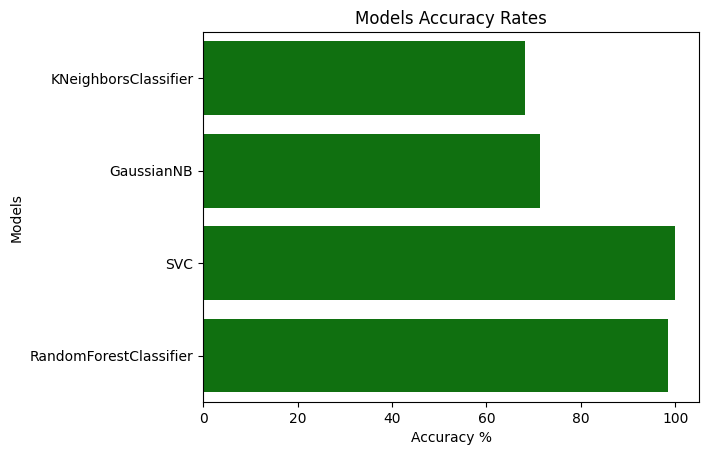

In [42]:
conclusion = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in Models:
    names = model.__class__.__name__
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)    
    conclusion = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(conclusion)
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="g")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Rates');    

In [43]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost only

In [44]:
ada = AdaBoostClassifier(n_estimators=100, learning_rate=1)
ada_model = ada.fit(x_train, y_train)

y_pred = ada_model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        25
           B       1.00      1.00      1.00       111
           C       1.00      1.00      1.00        54
           D       1.00      1.00      1.00         5

    accuracy                           1.00       195
   macro avg       1.00      1.00      1.00       195
weighted avg       1.00      1.00      1.00       195



# AdaBoost after RF

In [46]:
adarf = AdaBoostClassifier(n_estimators=100, base_estimator=rf_tuned, learning_rate=1)
adarf_model = adarf.fit(x_train, y_train)

y_pred = adarf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9897435897435898

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.96      0.98        25
           B       0.99      1.00      1.00       111
           C       0.98      1.00      0.99        54
           D       1.00      0.80      0.89         5

    accuracy                           0.99       195
   macro avg       0.99      0.94      0.96       195
weighted avg       0.99      0.99      0.99       195



# AdaBoost after NB

In [48]:
adanb = AdaBoostClassifier(n_estimators=100, base_estimator=nb_model , learning_rate=1)
adanb_model = adanb.fit(x_train, y_train)

y_pred = adanb_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.6256410256410256

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.53      0.32      0.40        25
           B       0.67      0.77      0.72       111
           C       0.56      0.52      0.54        54
           D       0.25      0.20      0.22         5

    accuracy                           0.63       195
   macro avg       0.50      0.45      0.47       195
weighted avg       0.61      0.63      0.61       195



# COMPARISON - II

In [50]:
Models = [
    adarf_model,
    adanb_model,
    ada_model]
name = ['AdaBoost after Random Forest', 'AdaBoost after Naive Bayes',"AdaBoost only"]
i=0
for model in Models:
    names = name[i]
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(acc))
    i=i+1

----------------------------
AdaBoost after Random Forest:
Accuracy: 98.9744%
----------------------------
AdaBoost after Naive Bayes:
Accuracy: 62.5641%
----------------------------
AdaBoost only:
Accuracy: 100.0000%


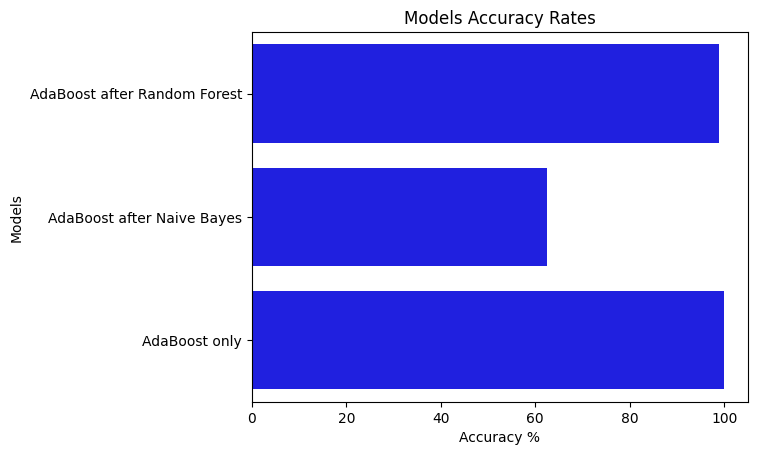

In [51]:
conclusion = []

results = pd.DataFrame(columns= ["Models","Accuracy"])
i=0
for model in Models:
    names = name[i]
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)    
    conclusion = pd.DataFrame([[names, acc*100]], columns= ["Models","Accuracy"])
    results = results.append(conclusion)
    i=i+1
    
    
sns.barplot(x= 'Accuracy', y = 'Models', data=results, color="b")
plt.xlabel('Accuracy %')
plt.title('Models Accuracy Rates');